In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset= pd.read_csv("knn_dataset_with_decimal_experience.csv")
dataset.head(3)

,Age,Experience,Salary
0,56,24.3,79183.71
1,46,21.3,78310.80
2,52,24.6,86092.82


<Axes: xlabel='Age', ylabel='Experience'>

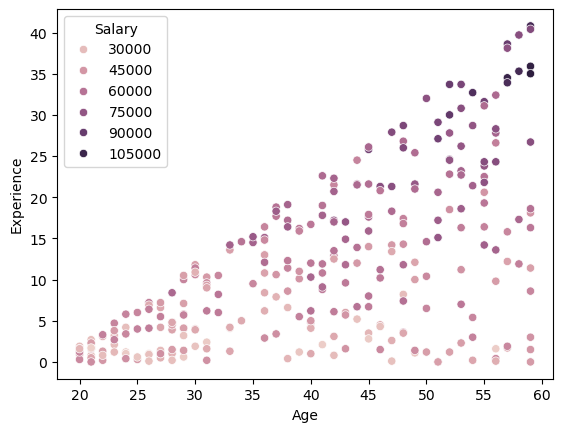

In [35]:
sns.scatterplot(x="Age",y="Experience",data=dataset,hue="Salary")

In [3]:
dataset.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

In [4]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

To find the best value for k we are using loop

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
for i in range(1, 20):
    knn1 = KNeighborsRegressor(n_neighbors=i)
    knn1.fit(x_train, y_train)
    
    # Score on training data
    train_score = knn1.score(x_train, y_train)*100
    
    # Score on test data
    test_score = knn1.score(x_test, y_test)*100
    
    print(f"k value: {i}, Training Accuracy: {train_score}, Test Accuracy: {test_score}")

k value: 1, Training Accuracy: 98.08020313790267, Test Accuracy: 65.91524661286402
k value: 2, Training Accuracy: 84.62618298646318, Test Accuracy: 72.29006729418761
k value: 3, Training Accuracy: 80.48566031444815, Test Accuracy: 74.54415372404834
k value: 4, Training Accuracy: 78.12009741831851, Test Accuracy: 79.46364457987163
k value: 5, Training Accuracy: 76.67391234285775, Test Accuracy: 77.28467069071374
k value: 6, Training Accuracy: 74.72998271096773, Test Accuracy: 75.86527463807631
k value: 7, Training Accuracy: 74.19978139781404, Test Accuracy: 75.45541388579126
k value: 8, Training Accuracy: 73.60828906648695, Test Accuracy: 75.04116796968101
k value: 9, Training Accuracy: 73.26924211005141, Test Accuracy: 76.15502939085599
k value: 10, Training Accuracy: 73.01776170994242, Test Accuracy: 76.4350790174037
k value: 11, Training Accuracy: 72.37005148341123, Test Accuracy: 75.93436762353052
k value: 12, Training Accuracy: 72.06685489074202, Test Accuracy: 75.80350567154122
k 

K=4 is best value

In [45]:
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [46]:
# Score on training data
train_score = knn.score(x_train, y_train)*100
    
    # Score on test data
test_score = knn.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")

 Training Accuracy: 78.12009741831851, Test Accuracy: 79.46364457987163


To increase model accuracy we can standardise data set and remove outliers or we can find a best k value using loop

In [49]:
knn.predict([[1.328322   , 1.292094]])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([71426.4825])

In [50]:
knn.predict([[-0.802220  , -0.991385]])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([35330.0375])

In [48]:
x,y

(          Age  Experience
 0    1.328322    1.292094
 1    0.476105    0.990312
 2    0.987435    1.322272
 3   -1.483994   -0.830435
 4    0.049997    1.121084
 ..        ...         ...
 295 -0.802220   -0.991385
 296 -0.461333    0.376690
 297  0.220440    0.346512
 298 -0.205668    0.084968
 299 -1.143107   -0.599069
 
 [300 rows x 2 columns],
 0      79183.71
 1      78310.80
 2      86092.82
 3      31904.97
 4      64018.35
          ...   
 295    36688.46
 296    72635.41
 297    66912.70
 298    56690.56
 299    54566.58
 Name: Salary, Length: 300, dtype: float64)

In [51]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)

ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)